In [ ]:
# prompt:

# This code snippet will print the current working directory.
!pwd


/content


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pwd


/content


In [7]:
!ls


drive  sample_data


In [12]:
X_train=np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/input.csv',delimiter=',')
Y_train=np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/labels.csv',delimiter=',')
X_test=np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/input_test.csv',delimiter=',')
Y_test=np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/labels_test.csv',delimiter=',')


In [9]:
pip install numpy


In [11]:
import numpy as np

In [13]:
print("Shape of X_train:",X_train.shape)
print("Shape of Y_train:",Y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of Y_test:",Y_test.shape)


Shape of X_train: (2000, 30000)
Shape of Y_train: (2000,)
Shape of X_test: (400, 30000)
Shape of Y_test: (400,)


In [14]:
X_train=X_train.reshape(len(X_train),100,100,3)
X_test=X_test.reshape(len(X_test),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)
Y_test=Y_test.reshape(len(Y_test),1)

In [15]:
X_train=X_train/255.0
X_test=X_test/255.0

In [16]:
import matplotlib.pyplot as plt

In [17]:
import random

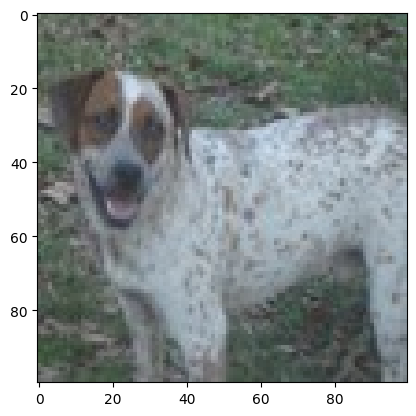

In [18]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [ ]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [19]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 24s 697ms/step - loss: 0.7309 - accuracy: 0.5320
Epoch 2/5
32/32 [==============================] - 20s 629ms/step - loss: 0.6729 - accuracy: 0.6120
Epoch 3/5
32/32 [==============================] - 22s 687ms/step - loss: 0.6265 - accuracy: 0.6575
Epoch 4/5
32/32 [==============================] - 24s 737ms/step - loss: 0.5855 - accuracy: 0.6940
Epoch 5/5
32/32 [==============================] - 20s 626ms/step - loss: 0.5733 - accuracy: 0.7160


In [ ]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 40s 1s/step - loss: 0.4787 - accuracy: 0.7795
Epoch 2/5
32/32 [==============================] - 21s 637ms/step - loss: 0.4155 - accuracy: 0.8080
Epoch 3/5
32/32 [==============================] - 20s 626ms/step - loss: 0.3578 - accuracy: 0.8450
Epoch 4/5
32/32 [==============================] - 22s 696ms/step - loss: 0.2937 - accuracy: 0.8850
Epoch 5/5
32/32 [==============================] - 20s 634ms/step - loss: 0.2256 - accuracy: 0.9170


In [ ]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 21s 637ms/step - loss: 0.1485 - accuracy: 0.9530
Epoch 2/5
32/32 [==============================] - 20s 635ms/step - loss: 0.1179 - accuracy: 0.9645
Epoch 3/5
32/32 [==============================] - 22s 702ms/step - loss: 0.0568 - accuracy: 0.9875
Epoch 4/5
32/32 [==============================] - 20s 633ms/step - loss: 0.0329 - accuracy: 0.9965
Epoch 5/5
32/32 [==============================] - 22s 687ms/step - loss: 0.0176 - accuracy: 0.9995


In [ ]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 1s 92ms/step - loss: 1.4778 - accuracy: 0.6525


[1.4777735471725464, 0.6524999737739563]

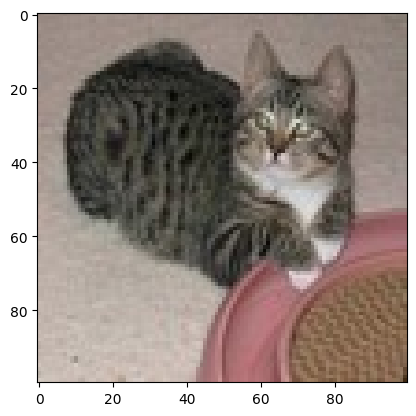

1/1 [==============================] - 0s 83ms/step
Our model says it is a : cat


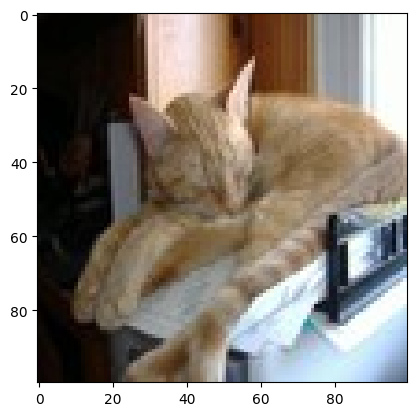

1/1 [==============================] - 0s 104ms/step
Our model says it is a : cat


In [ ]:
idx2=random.randint(0,len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred=model.predict(X_test[idx2, :].reshape(1,100,100,3))
ypred=y_pred>0.5
if(y_pred==0):
  pred='dog'
else:
  pred='cat'
print("Our model says it is a :",pred)